In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df = pd.read_csv("Retail_Prices_of _Products.csv")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118482 entries, 0 to 118481
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              118482 non-null  int64  
 1   Month             118482 non-null  object 
 2   GEO               118482 non-null  object 
 3   Product Category  118482 non-null  object 
 4   Products          118482 non-null  object 
 5   VALUE             118482 non-null  float64
 6   Taxable           118482 non-null  object 
 7   Total tax rate    118482 non-null  float64
 8   Value after tax   118482 non-null  float64
 9   Essential         118482 non-null  object 
 10  COORDINATE        118482 non-null  float64
 11  UOM               118482 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 10.8+ MB
None


In [ ]:
print(df.isnull().sum())

Year                0
Month               0
GEO                 0
Product Category    0
Products            0
VALUE               0
Taxable             0
Total tax rate      0
Value after tax     0
Essential           0
COORDINATE          0
UOM                 0
dtype: int64


#Distribuição de preços

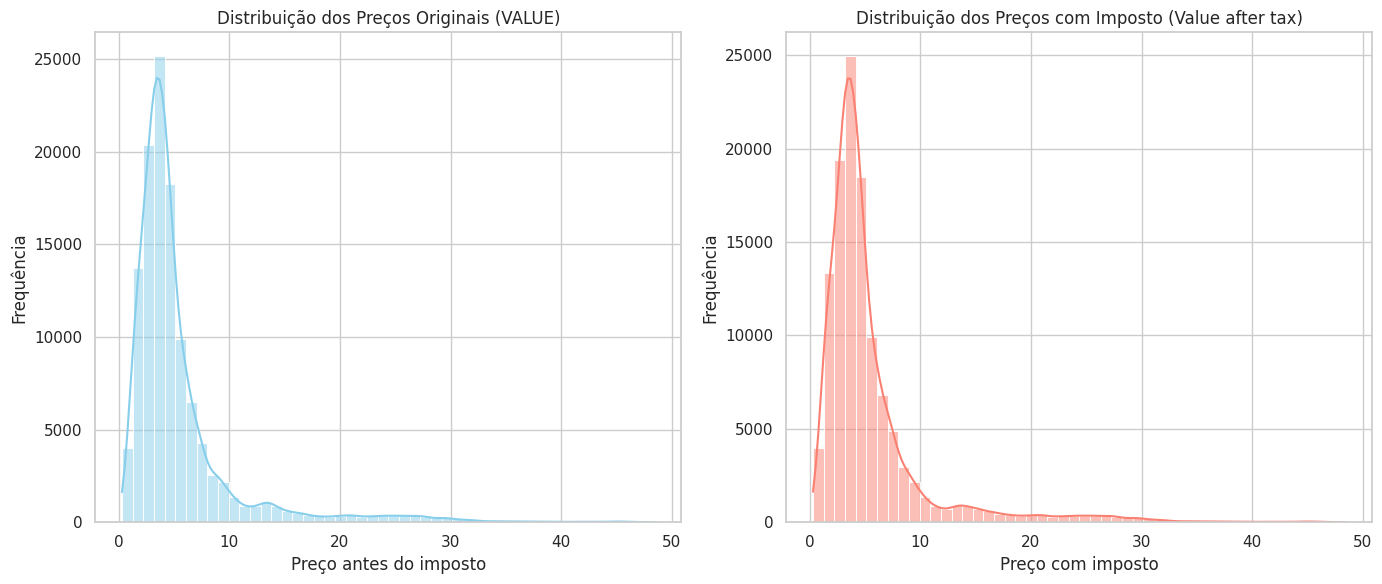

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df["VALUE"], bins=50, kde=True, color='skyblue')
plt.title("Distribuição dos Preços Originais (VALUE)")
plt.xlabel("Preço antes do imposto")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
sns.histplot(df["Value after tax"], bins=50, kde=True, color='salmon')
plt.title("Distribuição dos Preços com Imposto (Value after tax)")
plt.xlabel("Preço com imposto")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

# Impacto da tributação nos preços

<ipython-input-10-74e366437417>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Taxable", y="VALUE", palette="Blues")
<ipython-input-10-74e366437417>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Taxable", y="Value after tax", palette="Reds")


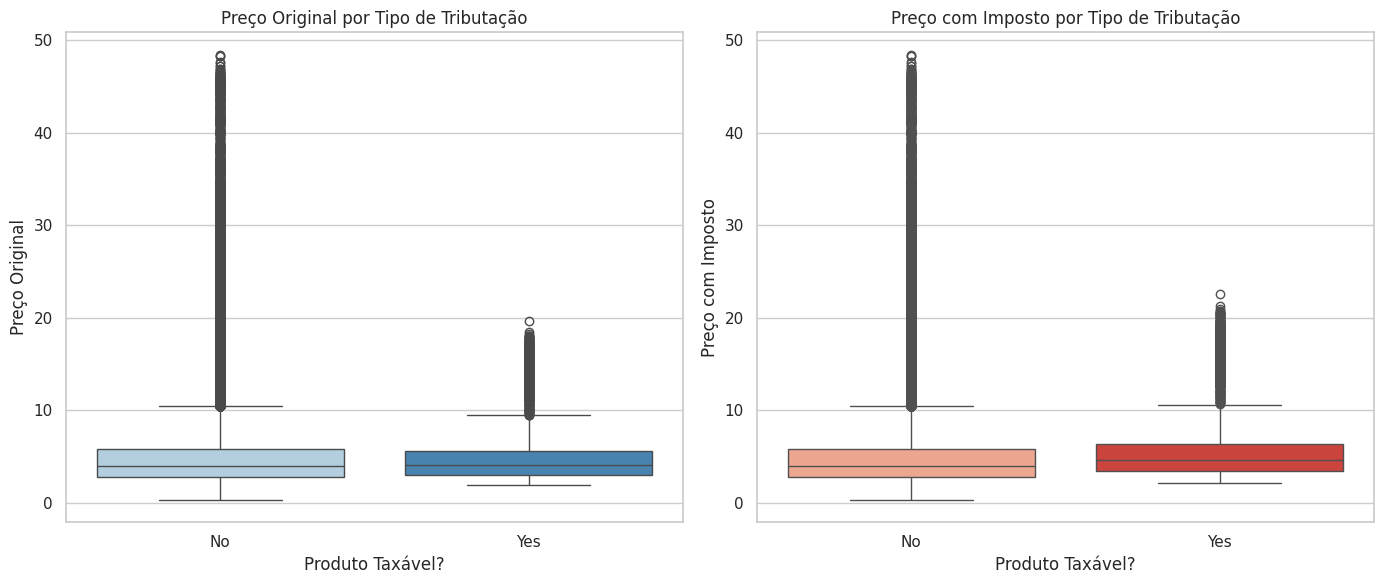

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Taxable", y="VALUE", palette="Blues")
plt.title("Preço Original por Tipo de Tributação")
plt.xlabel("Produto Taxável?")
plt.ylabel("Preço Original")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Taxable", y="Value after tax", palette="Reds")
plt.title("Preço com Imposto por Tipo de Tributação")
plt.xlabel("Produto Taxável?")
plt.ylabel("Preço com Imposto")

plt.tight_layout()
plt.show()

#Comparação entre Essenciais e Não-Essenciais

<ipython-input-11-cf29742447e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Essential", y="Value after tax", palette="coolwarm")


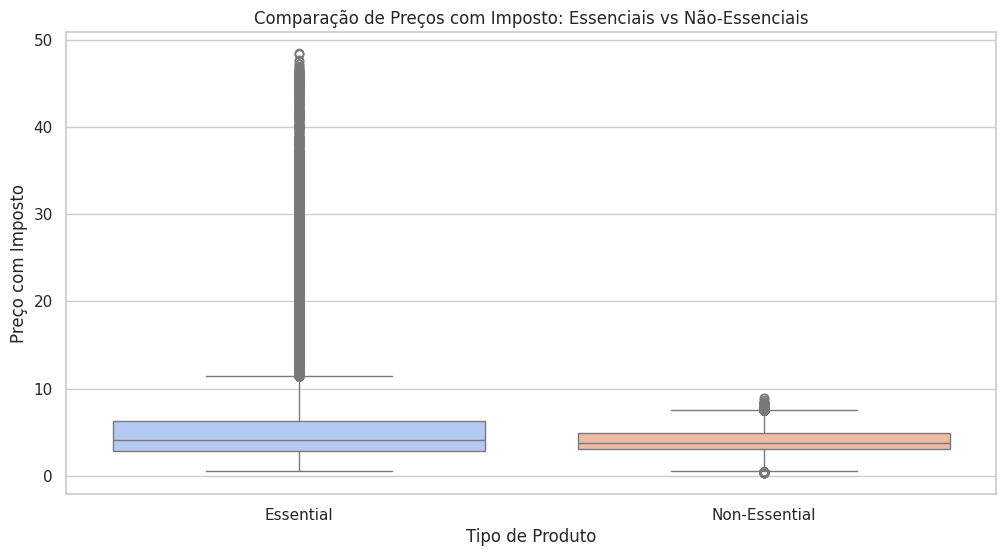

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Essential", y="Value after tax", palette="coolwarm")
plt.title("Comparação de Preços com Imposto: Essenciais vs Não-Essenciais")
plt.xlabel("Tipo de Produto")
plt.ylabel("Preço com Imposto")
plt.show()

#Tendência Temporal (ano-mês)

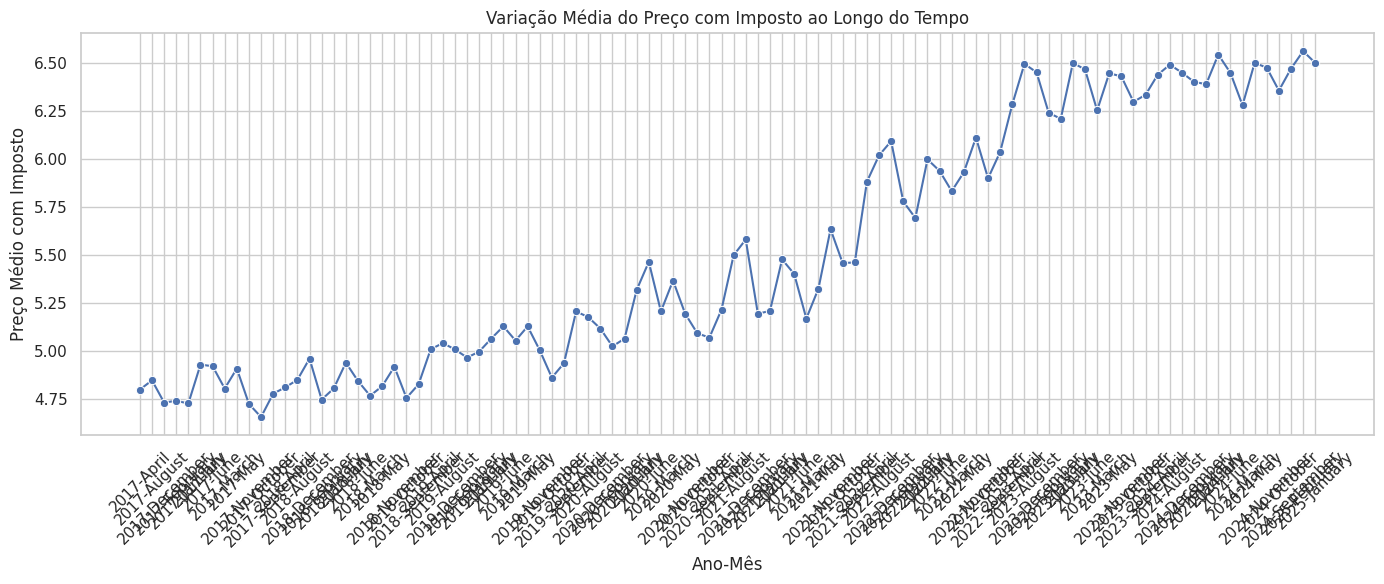

In [ ]:
df["YearMonth"] = df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2)
df_grouped = df.groupby("YearMonth")["Value after tax"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped, x="YearMonth", y="Value after tax", marker="o")
plt.xticks(rotation=45)
plt.title("Variação Média do Preço com Imposto ao Longo do Tempo")
plt.xlabel("Ano-Mês")
plt.ylabel("Preço Médio com Imposto")
plt.tight_layout()
plt.show()

#Top 10 Produtos mais caros (média após imposto)

<ipython-input-13-5bdf582130e8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


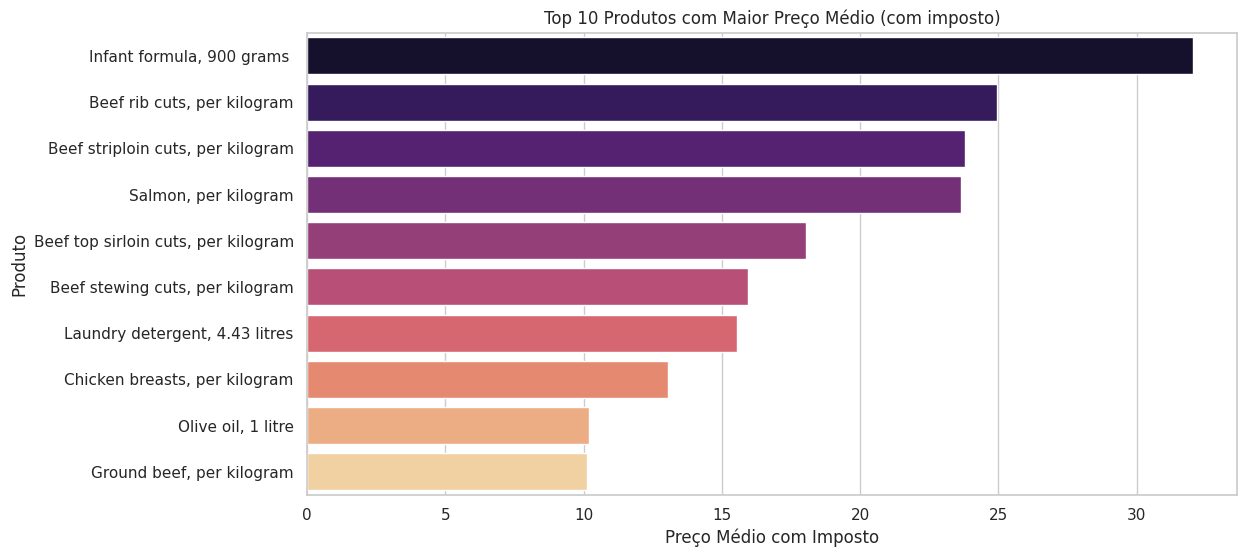

In [ ]:
top_products = df.groupby("Products")["Value after tax"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Produtos com Maior Preço Médio (com imposto)")
plt.xlabel("Preço Médio com Imposto")
plt.ylabel("Produto")
plt.show()

# Resumo

Distribuição de preços: A maioria dos produtos apresenta preços concentrados em faixas mais baixas (entre 2 e 10 unidades monetárias), com presença de alguns outliers que elevam a média. Isso indica que existem produtos mais caros no portfólio, mas são minoria.

Impacto da tributação: Produtos classificados como "Taxable" apresentam preços finais (com imposto) levemente superiores aos "Non-Taxable". A diferença não é tão expressiva em todos os casos, sugerindo que a alíquota pode ser baixa ou que o imposto é aplicado de forma seletiva.

Essenciais vs Não-Essenciais: Produtos essenciais tendem a ter preços mais acessíveis e menor variação, o que reforça seu papel social. Já os não-essenciais mostram uma dispersão maior nos valores, incluindo preços elevados.

Evolução temporal: Observando a média de preços ao longo do tempo (Ano-Mês), foram identificadas variações que podem estar relacionadas à sazonalidade, inflação ou ajustes nas taxas tributárias. Essa análise ajuda a entender padrões de comportamento ao longo dos períodos.

Produtos com maior valor agregado: Os 10 produtos com maior preço médio após imposto são, em sua maioria, não essenciais. Mesmo com volume possivelmente menor, esses itens podem ter grande impacto no faturamento e merecem atenção em estratégias comerciais.